## Lens Tutorial

This tutorial illustrates the construction of optics.Lens objects in the MORTICIA sensor package.

In [1]:
import numpy as np
import pandas as pd
import xray
xD = xray.DataArray  # Abbreviation for creating xray.DataArray objects
import matplotlib.pyplot as plt
import scipy.interpolate
from pint import UnitRegistry
ureg = UnitRegistry()
Q_ = ureg.Quantity
def U_(units):
    # Utility function for pint Quantity of 1.0 with given units
    return Q_(1.0, units)
%matplotlib inline
# Set plot default figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
import morticia.sensor.optics as optics
%load_ext autoreload
%aimport morticia.sensor.optics
%autoreload 1

In [2]:
# Set up the spectral transmission function for a optics.Lens object
spec_trans = xray.DataArray([ 0.0, 0.4, 0.75, 0.93, 0.925, 0.91, 0.89, 0.4, 0.0],                      
                   [('wvl', [550., 600, 650, 700, 750, 800, 850, 950, 1000], {'units': 'nm'})], 
                   name='trn',
                   attrs={'units': '', 'extrap_val': 0.0})
spec_wfe = xray.DataArray([0.02, 0.01], [('wvl', [550.0, 1000.0], {'units': 'nm'})], 
                          name='wfe', 
                          attrs={'units': '', 'extrap_val': 0.0})

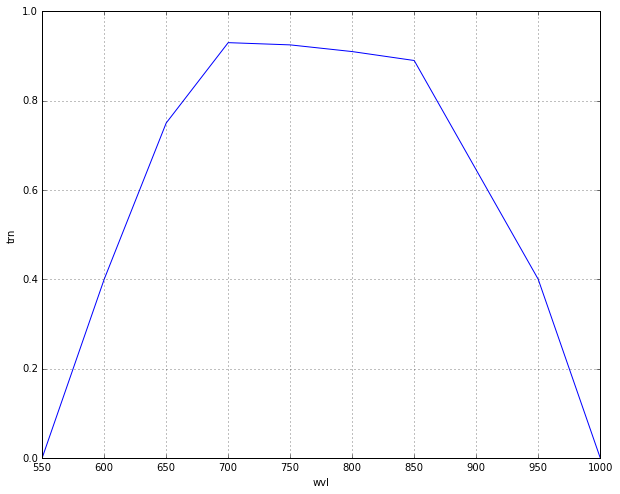

In [3]:
# Plot the spectral transmission function
spec_trans.plot()
plt.grid()

In [4]:
# Create a lens with above transmission and WFE
# Focal length is 30 mm, focal ratio (fno) is 1.0, central obscuration of 50%
mylens = optics.Lens(efl=[30, 'mm'], fno=1.0, trn=spec_trans, wfe=spec_wfe, obs=0.5)

In [7]:
mylens.mtf['spf']

<xray.DataArray 'spf' (spf: 25)>
array([    0.        ,    83.33333333,   166.66666667,   250.        ,
         333.33333333,   416.66666667,   500.        ,   583.33333333,
         666.66666667,   750.        ,   833.33333333,   916.66666667,
        1000.        ,  1083.33333333,  1166.66666667,  1250.        ,
        1333.33333333,  1416.66666667,  1500.        ,  1583.33333333,
        1666.66666667,  1750.        ,  1833.33333333,  1916.66666667,
        2000.        ])
Coordinates:
  * spf      (spf) float64 0.0 83.33 166.7 250.0 333.3 416.7 500.0 583.3 ...
Attributes:
    units: 1/mm
    long_name: Spatial Frequency

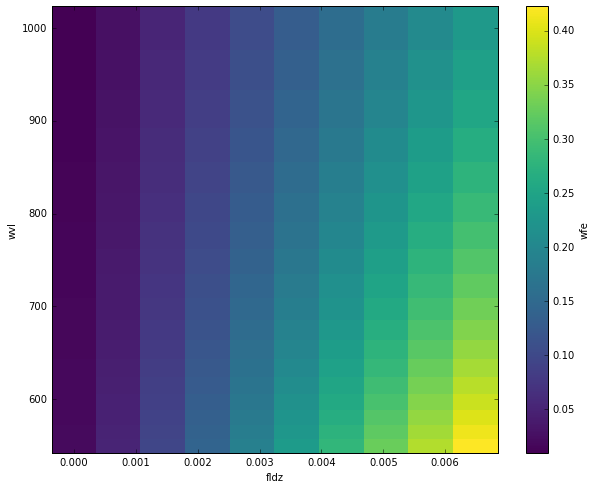

In [8]:
# Plot the total RMS wavefront error as a function of defocus (fldz) and wavelength (wvl)
# BTW, this would not work if the wfe were also a function of other variables (fldx, fldy)
# NOte that at zero defocus (fldz = 0)the WFE is a minimum for the shortest wavelength
mylens.rms_wfe_total.plot()

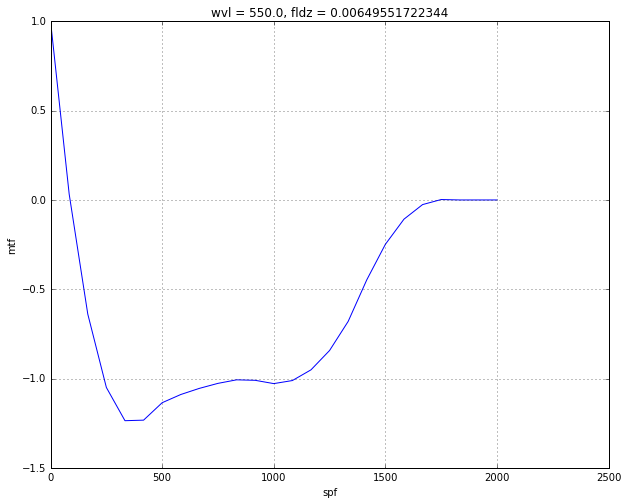

In [11]:
# Plot the MTF of the lens at extreme defocus
mylens.mtf[:,0,-1].plot()
plt.grid()

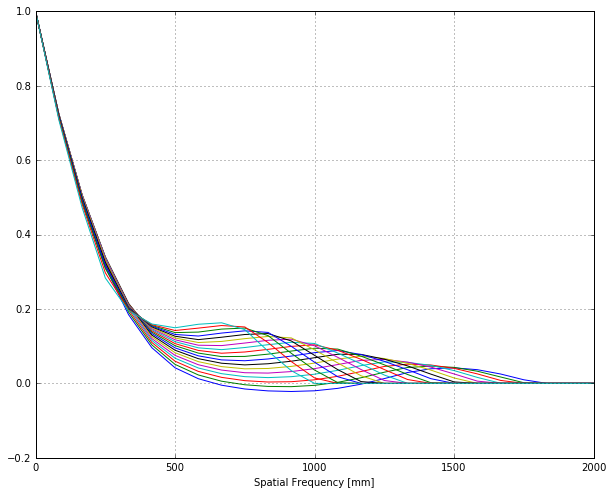

In [17]:
# Plot all the through-frequency MTFs at zero defocus
plt.plot(mylens.mtf['spf'], mylens.mtf[:,:,4])
plt.xlabel('Spatial Frequency [mm]')
plt.ylabel('')
plt.xlim([0, 2000])
plt.grid()

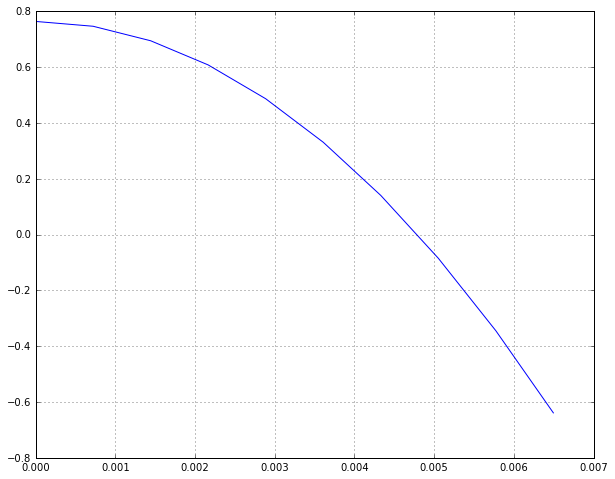

In [19]:
plt.plot(mylens.mtf['fldz'], mylens.mtf[2,0,:])
plt.grid()

In [ ]:
mylens.mtf